# Exoplanet Detection with AI/ML

This notebook implements machine learning models to detect exoplanets from NASA's cleaned exoplanet survey data.

## Dataset
- **File**: `cleaned_data.csv` (1,782 samples, 41 features)
- **Target**: `tfopwg_disp` (0=Not Exoplanet, 1=Exoplanet)
- **Features**: 40 exoplanet-related features (orbital period, transit depth, stellar properties, etc.)

## Models
- XGBoost
- CatBoost (with compatibility fixes)
- SVM (Support Vector Machine)

## Data Processing
- **Normalization**: StandardScaler applied to all features
- **Comparison**: Models trained with and without normalization

## Data Split
- 60% Training
- 20% Validation
- 20% Testing


## 1. Import Libraries and Setup


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


## 2. Data Loading and Exploration


In [5]:
# Load the cleaned dataset
data_path = 'cleaned_data.csv'

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    print(f"Target column 'tfopwg_disp' distribution:")
    print(df['tfopwg_disp'].value_counts())
    print(f"Target column proportions:")
    print(df['tfopwg_disp'].value_counts(normalize=True))
except FileNotFoundError:
    print("Error: cleaned_data.csv not found. Please ensure the file is in the same directory as this notebook.")


Dataset loaded successfully!
Shape: (1782, 29)
Columns: ['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad', 'st_pmra_err', 'st_pmdec_err', 'pl_tranmid_err', 'pl_orbper_err', 'pl_trandurh_err', 'pl_trandep_err', 'pl_rade_err', 'st_tmag_err', 'st_dist_err', 'st_teff_err', 'st_logg_err', 'st_rad_err']
Target column 'tfopwg_disp' distribution:
tfopwg_disp
1    970
0    812
Name: count, dtype: int64
Target column proportions:
tfopwg_disp
1    0.544332
0    0.455668
Name: proportion, dtype: float64


In [6]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
print(f"Shape: {df.shape}")
print(f"\nColumn types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nFirst few rows:")
df.head()


Dataset Info:
Shape: (1782, 29)

Column types:
tfopwg_disp          int64
ra                 float64
dec                float64
st_pmra            float64
st_pmdec           float64
pl_tranmid         float64
pl_orbper          float64
pl_trandurh        float64
pl_trandep         float64
pl_rade            float64
pl_insol           float64
pl_eqt             float64
st_tmag            float64
st_dist            float64
st_teff            float64
st_logg            float64
st_rad             float64
st_pmra_err        float64
st_pmdec_err       float64
pl_tranmid_err     float64
pl_orbper_err      float64
pl_trandurh_err    float64
pl_trandep_err     float64
pl_rade_err        float64
st_tmag_err        float64
st_dist_err        float64
st_teff_err        float64
st_logg_err        float64
st_rad_err         float64
dtype: object

Missing values:
tfopwg_disp        0
ra                 0
dec                0
st_pmra            0
st_pmdec           0
pl_tranmid         0
pl_orbper    

,tfopwg_disp,ra,dec,st_pmra,st_pmdec,pl_tranmid,pl_orbper,pl_trandurh,pl_trandep,pl_rade,...,pl_tranmid_err,pl_orbper_err,pl_trandurh_err,pl_trandep_err,pl_rade_err,st_tmag_err,st_dist_err,st_teff_err,st_logg_err,st_rad_err
0,0,112.357708,-12.695960,-5.964,-0.076,2.459230e+06,2.171348,2.01722,656.886099,5.818163,...,0.001657,0.000264,0.319588,37.77821,1.910546,0.013,11.9515,264.7,0.07,0.072573
1,0,122.178195,-48.802811,-4.496,9.347,2.459987e+06,3.573014,3.37000,755.000000,11.311300,...,0.003748,0.000013,1.029000,1306.55000,3.247140,0.006,4.6175,171.1,0.07,0.060000
2,0,116.110771,-36.098285,-9.231,11.614,2.459239e+06,12.688942,7.92010,3232.852788,14.060834,...,0.006715,0.009509,0.539377,235.25328,15.241591,0.006,3.7840,135.8,0.08,0.047980
3,0,124.726411,-37.783250,-11.278,9.593,2.458519e+06,1.104220,2.37000,14177.700000,21.044800,...,0.001370,0.000130,0.062000,843.78800,5.220120,0.006,4.7245,157.0,0.55,0.070000
4,0,111.716019,-50.266567,-8.018,11.560,2.458493e+06,4.959120,2.50900,7440.000000,22.912300,...,0.000730,0.000160,0.130000,197.96200,3.280550,0.006,2.9645,124.3,0.07,0.090000


Target variable distribution:
tfopwg_disp
1    970
0    812
Name: count, dtype: int64

Proportions:
tfopwg_disp
1    0.544332
0    0.455668
Name: proportion, dtype: float64


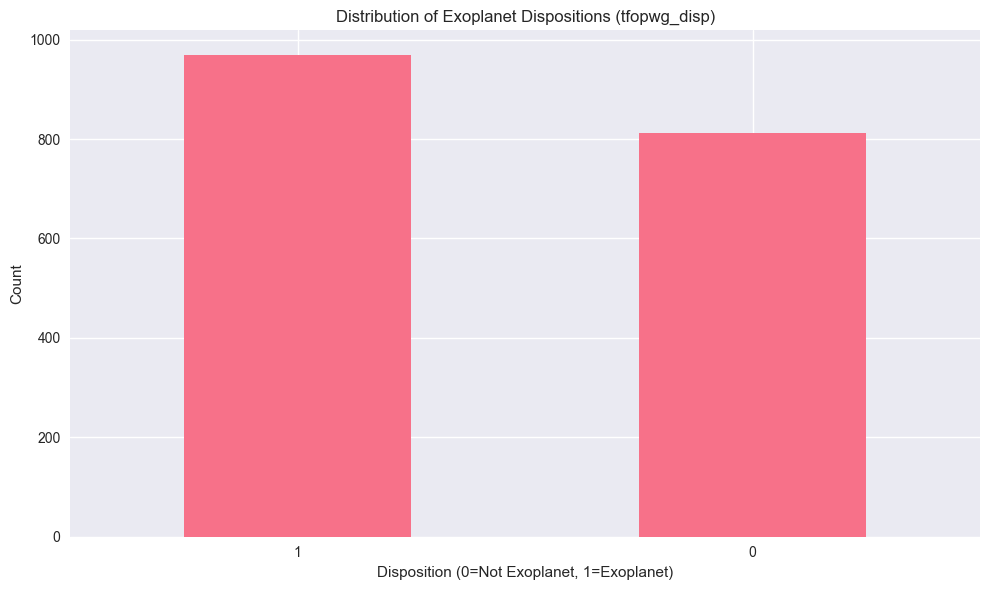

In [7]:
# Check target variable distribution
if 'tfopwg_disp' in df.columns:
    print("Target variable distribution:")
    print(df['tfopwg_disp'].value_counts())
    print(f"\nProportions:")
    print(df['tfopwg_disp'].value_counts(normalize=True))
    
    # Visualize target distribution
    plt.figure(figsize=(10, 6))
    df['tfopwg_disp'].value_counts().plot(kind='bar')
    plt.title('Distribution of Exoplanet Dispositions (tfopwg_disp)')
    plt.xlabel('Disposition (0=Not Exoplanet, 1=Exoplanet)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Target variable 'tfopwg_disp' not found in the dataset.")
    print("Available columns:", list(df.columns))


## 3. Data Preparation with Normalization
 

In [9]:
# Prepare data with normalization
df_processed = df.copy()

print("Preparing data with normalization...")
print(f"Dataset shape: {df_processed.shape}")
print(f"Missing values: {df_processed.isnull().sum().sum()}")
print(f"Columns: {list(df_processed.columns)}")

# Handle any remaining missing values
if df_processed.isnull().sum().sum() > 0:
    print("Handling missing values...")
    df_processed = df_processed.fillna(df_processed.median())
    print(f"Missing values after filling: {df_processed.isnull().sum().sum()}")


Preparing data with normalization...
Dataset shape: (1782, 29)
Missing values: 0
Columns: ['tfopwg_disp', 'ra', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad', 'st_pmra_err', 'st_pmdec_err', 'pl_tranmid_err', 'pl_orbper_err', 'pl_trandurh_err', 'pl_trandep_err', 'pl_rade_err', 'st_tmag_err', 'st_dist_err', 'st_teff_err', 'st_logg_err', 'st_rad_err']


In [10]:
# Prepare features and target (using raw data)
if 'tfopwg_disp' in df_processed.columns:
    # Use tfopwg_disp as target: 1 for exoplanets, 0 for non-exoplanets
    y = df_processed['tfopwg_disp']
    
    # Remove the target column from features
    X = df_processed.drop(columns=['tfopwg_disp'])
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Exoplanet ratio: {y.mean():.3f}")
    print(f"Features: {list(X.columns)}")
else:
    print("Target variable 'tfopwg_disp' not found. Please check your dataset.")
    X = df_processed
    y = None


Features shape: (1782, 28)
Target shape: (1782,)
Exoplanet ratio: 0.544
Features: ['ra', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad', 'st_pmra_err', 'st_pmdec_err', 'pl_tranmid_err', 'pl_orbper_err', 'pl_trandurh_err', 'pl_trandep_err', 'pl_rade_err', 'st_tmag_err', 'st_dist_err', 'st_teff_err', 'st_logg_err', 'st_rad_err']


In [11]:
# Apply normalization to features
print("Applying StandardScaler normalization...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print(f"Final features shape: {X_scaled.shape}")
print(f"Feature names: {list(X_scaled.columns)}")
print("✅ Features normalized using StandardScaler")

# Also keep raw features for comparison
X_raw = X.copy()
print("✅ Raw features saved for comparison")


Applying StandardScaler normalization...
Final features shape: (1782, 28)
Feature names: ['ra', 'dec', 'st_pmra', 'st_pmdec', 'pl_tranmid', 'pl_orbper', 'pl_trandurh', 'pl_trandep', 'pl_rade', 'pl_insol', 'pl_eqt', 'st_tmag', 'st_dist', 'st_teff', 'st_logg', 'st_rad', 'st_pmra_err', 'st_pmdec_err', 'pl_tranmid_err', 'pl_orbper_err', 'pl_trandurh_err', 'pl_trandep_err', 'pl_rade_err', 'st_tmag_err', 'st_dist_err', 'st_teff_err', 'st_logg_err', 'st_rad_err']
✅ Features normalized using StandardScaler
✅ Raw features saved for comparison


## 4. Data Splitting (60% Train, 20% Validation, 20% Test)


In [13]:
# Split the data: 60% train, 20% validation, 20% test
if y is not None:
    # Split normalized data
    X_train, X_temp, y_train, y_temp = train_test_split(
        X_scaled, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Split raw data with same indices
    X_train_raw, X_temp_raw, _, _ = train_test_split(
        X_raw, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val_raw, X_test_raw, _, _ = train_test_split(
        X_temp_raw, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_scaled)*100:.1f}%)")
    print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X_scaled)*100:.1f}%)")
    print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_scaled)*100:.1f}%)")
    
    print(f"\nTraining set exoplanet ratio: {y_train.mean():.3f}")
    print(f"Validation set exoplanet ratio: {y_val.mean():.3f}")
    print(f"Test set exoplanet ratio: {y_test.mean():.3f}")
    
    print(f"\n✅ Both normalized and raw data splits created for comparison")
else:
    print("Cannot split data without target variable.")


Training set: 1069 samples (60.0%)
Validation set: 356 samples (20.0%)
Test set: 357 samples (20.0%)

Training set exoplanet ratio: 0.544
Validation set exoplanet ratio: 0.545
Test set exoplanet ratio: 0.543

✅ Both normalized and raw data splits created for comparison


## 5. XGBoost Training and Evaluation (Normalized vs Raw Data)


In [15]:
# Install XGBoost if not already installed
try:
    import xgboost as xgb
    print("XGBoost is already installed.")
except ImportError:
    print("Installing XGBoost...")
    !pip install xgboost
    import xgboost as xgb
    print("XGBoost installed successfully.")


XGBoost is already installed.


Training XGBoost model on NORMALIZED data...
✅ XGBoost (Normalized) - Test AUC: 0.9477

Training XGBoost model on RAW data...
✅ XGBoost (Raw) - Test AUC: 0.9509

📊 XGBoost Comparison:
Normalized Data AUC: 0.9477
Raw Data AUC: 0.9509
Difference: 0.0032
✅ Using raw data model as primary

Top 10 Most Important Features:
            feature  importance
10           pl_eqt    0.167258
24      st_dist_err    0.067424
20  pl_trandurh_err    0.058786
7        pl_trandep    0.048809
12          st_dist    0.047163
9          pl_insol    0.039986
8           pl_rade    0.039185
15           st_rad    0.037634
4        pl_tranmid    0.035785
22      pl_rade_err    0.035783


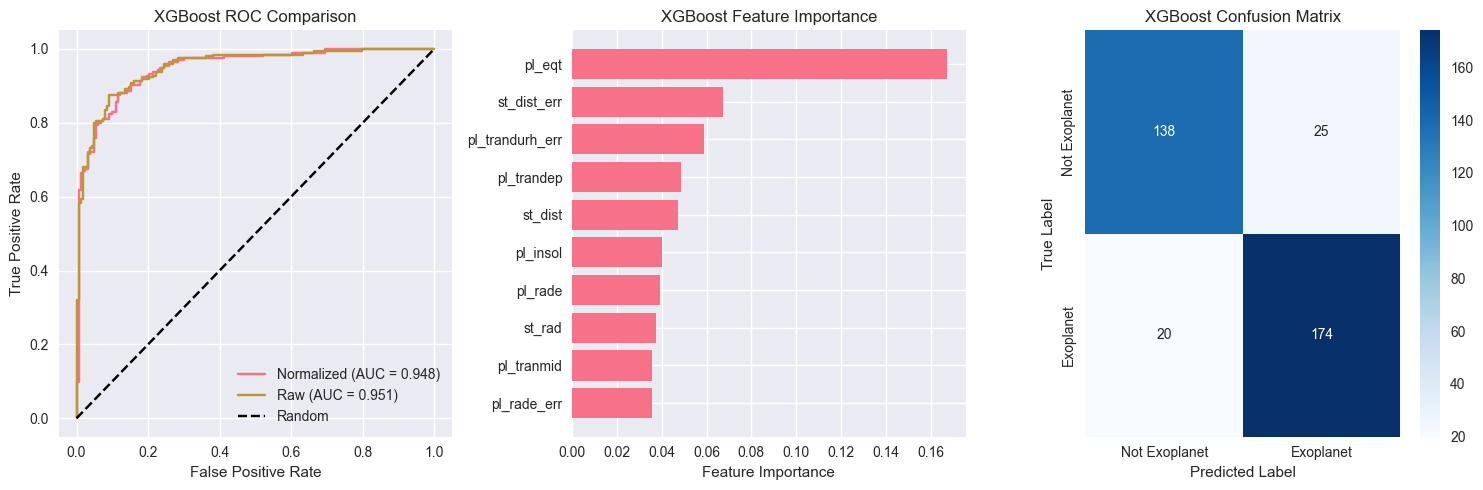

In [16]:
# XGBoost Training - Normalized Data
if y is not None:
    print("Training XGBoost model on NORMALIZED data...")
    print("=" * 60)
    
    # XGBoost parameters
    xgb_params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'learning_rate': 0.1,
        'n_estimators': 100,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'early_stopping_rounds': 10,
        'random_state': 42
    }
    
    # Create and train XGBoost model on normalized data
    xgb_model_norm = xgb.XGBClassifier(**xgb_params)
    
    # Train with early stopping
    try:
        xgb_model_norm.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
    except TypeError:
        xgb_params_fallback = xgb_params.copy()
        xgb_params_fallback.pop('early_stopping_rounds', None)
        xgb_model_norm = xgb.XGBClassifier(**xgb_params_fallback)
        xgb_model_norm.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=10, verbose=False)
    
    # Make predictions on normalized data
    y_test_pred_xgb_norm = xgb_model_norm.predict(X_test)
    y_test_proba_xgb_norm = xgb_model_norm.predict_proba(X_test)[:, 1]
    test_auc_xgb_norm = roc_auc_score(y_test, y_test_proba_xgb_norm)
    
    print(f"✅ XGBoost (Normalized) - Test AUC: {test_auc_xgb_norm:.4f}")
    
    # XGBoost Training - Raw Data
    print("\nTraining XGBoost model on RAW data...")
    print("=" * 60)
    
    # Create and train XGBoost model on raw data
    xgb_model_raw = xgb.XGBClassifier(**xgb_params)
    
    try:
        xgb_model_raw.fit(X_train_raw, y_train, eval_set=[(X_val_raw, y_val)], verbose=False)
    except TypeError:
        xgb_params_fallback = xgb_params.copy()
        xgb_params_fallback.pop('early_stopping_rounds', None)
        xgb_model_raw = xgb.XGBClassifier(**xgb_params_fallback)
        xgb_model_raw.fit(X_train_raw, y_train, eval_set=[(X_val_raw, y_val)], early_stopping_rounds=10, verbose=False)
    
    # Make predictions on raw data
    y_test_pred_xgb_raw = xgb_model_raw.predict(X_test_raw)
    y_test_proba_xgb_raw = xgb_model_raw.predict_proba(X_test_raw)[:, 1]
    test_auc_xgb_raw = roc_auc_score(y_test, y_test_proba_xgb_raw)
    
    print(f"✅ XGBoost (Raw) - Test AUC: {test_auc_xgb_raw:.4f}")
    
    # Comparison
    print(f"\n📊 XGBoost Comparison:")
    print(f"Normalized Data AUC: {test_auc_xgb_norm:.4f}")
    print(f"Raw Data AUC: {test_auc_xgb_raw:.4f}")
    print(f"Difference: {abs(test_auc_xgb_norm - test_auc_xgb_raw):.4f}")
    
    # Use the better performing model as the main model
    if test_auc_xgb_norm >= test_auc_xgb_raw:
        xgb_model = xgb_model_norm
        y_test_pred_xgb = y_test_pred_xgb_norm
        y_test_proba_xgb = y_test_proba_xgb_norm
        test_auc = test_auc_xgb_norm
        print("✅ Using normalized data model as primary")
    else:
        xgb_model = xgb_model_raw
        y_test_pred_xgb = y_test_pred_xgb_raw
        y_test_proba_xgb = y_test_proba_xgb_raw
        test_auc = test_auc_xgb_raw
        print("✅ Using raw data model as primary")
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': X_scaled.columns,
        'importance': xgb_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Plot comparison
    plt.figure(figsize=(15, 5))
    
    # ROC curves comparison
    plt.subplot(1, 3, 1)
    fpr_norm, tpr_norm, _ = roc_curve(y_test, y_test_proba_xgb_norm)
    fpr_raw, tpr_raw, _ = roc_curve(y_test, y_test_proba_xgb_raw)
    plt.plot(fpr_norm, tpr_norm, label=f'Normalized (AUC = {test_auc_xgb_norm:.3f})')
    plt.plot(fpr_raw, tpr_raw, label=f'Raw (AUC = {test_auc_xgb_raw:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('XGBoost ROC Comparison')
    plt.legend()
    plt.grid(True)
    
    # Feature importance
    plt.subplot(1, 3, 2)
    top_features = feature_importance.head(10)
    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title('XGBoost Feature Importance')
    plt.gca().invert_yaxis()
    
    # Confusion Matrix
    plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_test, y_test_pred_xgb)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Exoplanet', 'Exoplanet'],
                yticklabels=['Not Exoplanet', 'Exoplanet'])
    plt.title('XGBoost Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("Cannot train XGBoost without target variable.")


## 9. Model Saving and Summary


In [18]:
# Save models and preprocessing objects
if y is not None:
    import joblib
    import os
    
    # Create models directory
    os.makedirs('models', exist_ok=True)
    
    # Save models
    if 'xgb_model' in locals():
        joblib.dump(xgb_model, 'models/xgb_model.pkl')
        print("✅ XGBoost model saved to models/xgb_model.pkl")
    
    
    # Save preprocessing objects
    joblib.dump(scaler, 'models/scaler1.pkl')
    print("✅ Scaler saved to models/scaler1.pkl")
    
    # Save feature names
    joblib.dump(list(X_scaled.columns), 'models/feature_names1.pkl')
    print("✅ Feature names saved to models/feature_names1.pkl")
    
    print("\n🎉 All models and preprocessing objects saved successfully!")
    
    # Summary
    print("\n" + "="*80)
    print("EXOPLANET DETECTION MODEL SUMMARY")
    print("="*80)
    print(f"Dataset size: {len(df)} samples")
    print(f"Features: {X_scaled.shape[1]}")
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Exoplanet ratio: {y.mean():.3f}")
    
else:
    print("Cannot save models without target variable.")


✅ XGBoost model saved to models/xgb_model.pkl
✅ Scaler saved to models/scaler1.pkl
✅ Feature names saved to models/feature_names1.pkl

🎉 All models and preprocessing objects saved successfully!

EXOPLANET DETECTION MODEL SUMMARY
Dataset size: 1782 samples
Features: 28
Training samples: 1069
Validation samples: 356
Test samples: 357
Exoplanet ratio: 0.544
